In [1]:
import IPython
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy import fftpack

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### The Duplex Model of Sound Localization

Humans are quite good at telling where the sounds we hear are coming from. For sounds straight ahead at eye level, we can detect when a sound source moves side-to-side by as little as one degree. [source](https://www.cs.cmu.edu/~robust/Papers/SternWangBrownChapter.pdf)

While we use many tricks to achieve this, much of the heavy lifting is done by just two processes, discovered at the start of the 1900s by physicist John William Strutt<sup>1</sup>. This is called the *duplex model* of sound localization.

#### Interaural Intensity Differences (IID)
Sound gets quieter when something is in its way -- even our own heads. If someone sitting to your right speaks, their voice will be louder in your right ear than in your left, because your head blocked the sound on its way to your left ear.

When our brains compare the sound signal from both ears, whichever side is loudest must be the side the sound came from. This is the *interaural intensity difference*.

#### Interaural Timing Differences (ITD)
Sound also takes time to travel. This is easy to notice when you listen to your echo in a large auditorium. That means if someone sitting to your right speaks, their voice will reach your right ear before it reaches your left ear.

When our brains compare the sound signal from both ears, whichever side comes first must be the side the sound came from. This is the *interaural timing difference*.

### The Duplex Model in Action

By understanding just these two methods, it's easy to trick our brains into thinking they know where a sound is coming from.

Using the code below, we can generate some sounds, and then change their *loudness* and *timing* to show how our brains use those cues to position sounds in space.

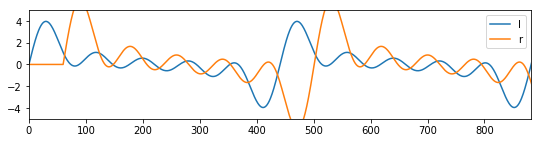

In [23]:

#First, we need to make a sound. The code below creates pure
#and complex tones for us to listen to.

class tonegen: 
    
    def __init__(self, samplerate):
        """Create an empty array"""
        self.fs = samplerate
        self.x = np.arange(self.fs)    
        self.duration = np.shape(self.x)[0]      
        self.y = [ 0 for i in range(self.duration)]

    def addfreq(self,f):
        addy = [ np.sin(2*np.pi*f* (i/self.fs)) for i in range(self.duration)]
        self.y = np.add(self.y, addy)
        
    def subfreq(self,f):
        addy = [ np.sin(2*np.pi*f* (i/self.fs)) for i in range(self.duration)]
        self.y = np.subtract(self.y, addy)

    def get(self):
        return self.x,self.y
    
    def getrate(self):
        return self.fs
    
    def compose(self, freqlist):
        for freq in freqlist:
            self.addfreq(freq)
    
    def remove(self, freqlist):
        for freq in freqlist:
            self.subfreq(freq)
            
    def build(self, f0, steps):
        for step in range(steps):
            self.addfreq(f0*(step+1))
    
tone = tonegen(44100)
#tone.compose([4,100,400])


tone.build(f0=100, steps=5)


# tone.addfreq(400)
# tone.addfreq(500)
# tone.addfreq(600)


x,y = tone.get()


tonepic = pd.DataFrame()

def rightearcues(delay=0,volume=1):
    tonepic['r'] = tonepic['r'].shift(delay).fillna(0)
    tonepic['r'] = tonepic['r']*volume

tonepic['l'] = y
tonepic['r'] = y


rightearcues(delay=60, volume=1.5)


tonepic.plot(xlim=(0,44100/50), ylim=(-5,5), figsize=(9,2));
IPython.display.Audio(data=[tonepic['l'],tonepic['r']], rate=tone.getrate(), autoplay=True)


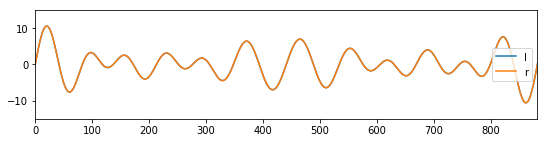

In [9]:
tone.addfreq(400)
tone.addfreq(500)
tone.addfreq(600)
tone.addfreq(650)

x,y = tone.get()
tonepic = pd.DataFrame()

tonepic['l'] = y
tonepic['r'] = y

tonepic.plot(xlim=(0,44100/50), ylim=(-15,15), figsize=(9,2));
IPython.display.Audio(data=[tonepic['l'],tonepic['r']], rate=tone.getrate(), autoplay=True)


In [6]:
myfft = fftpack.rfft(y, axis=0)